<a href="https://colab.research.google.com/github/harnalashok/LLMs/blob/main/LLMs_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 28th March, 2024

## Byte Pair Encoding
How tokenization is done in GPTs   

Ref: See [here](https://leimao.github.io/blog/Byte-Pair-Encoding/)   
Also see [huggingface](https://huggingface.co/learn/nlp-course/en/chapter6/5)

>In natural language processing models, the inputs to the model are usually sequences of sentences, such as “I went to New York last week.”. The sequence consists of tokens. In old language models, tokens are usually white-space separated words and punctuations, such as [“i”, “went”, “to”, “new”, “york”, “last”, “week”, “.”]. Remember that the word2vec model was using this kind of tokenization method. However, this has some drawbacks. For example, if the model learned the relationship between “old”, “older”, and “oldest”, it does not tell the model anything about the relationship between “smart”, “smarter”, and “smartest”. However, in this case, if we use some subtokens such as “er” and “est”, and the model learned the relationship between “old”, “older”, and “oldest”, it will tell the model some information about the relationship between “smart”, “smarter”, and “smartest”. Now that using subtokens sounds a better tokenization method, how do we engineer these subtokens? Preparing subtokens by ourselves is heuristics and label consuming, thus is not desirable. But information theory comes and saves us again.

>In information theory, byte pair encoding (BPE) or diagram coding is a simple form of data compression in which the most common pair of consecutive bytes of data is replaced with a byte that does not occur within that data. On Wikipedia, there is a very good example of using BPE on a single string. It was also employed in natural language processing models, such as Transformer (trained on standard WMT 2014 English-German dataset) and GPT-2, to tokenize word sequences.

Token Learning from Dataset

>In the paper “Neural Machine Translation of Rare Words with Subword Units” published in 2015, the author has released the source code of doing byte pair encoding for a corpus of words. We count the frequency of each word shown in the corpus. For each word, we append a special stop token “\</w>” at the end of the word. We will talk about the motivation behind this later. We then split the word into characters. Initially, the tokens of the word are all of its characters plus the additional "\</w>" token. For example, the tokens for word “low” are [“l”, “o”, “w”, “\</w>”] in order. So after counting all the words in the dataset, we will get a vocabulary for the tokenized word with its corresponding counts, such as

In [ ]:
#1.   {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w e s t </w>': 6, 'w i d e s t </w>': 3}


In each iteration, we count the frequency of each consecutive byte pair, find out the most frequent one, and merge the two byte pair tokens to one token.

For the above example, in the first iteration of the merge, because byte pair “e” and “s” occurred 6 + 3 = 9 times which is the most frequent. We merge these into a new token “es”. Note that because token “s” is also gone in this particular example.

In [ ]:
#2.  {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}


In the second iteration of merge, token “es” and “t” occurred 6 + 3 = 9 times, which is the most frequent. We merge these to into a new token “est”. Note that because token “es” and “t” are also gone.

In [ ]:
#3. {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}


In the third iteration of the merge, token “est” and “\</w>” pair is the most frequent, etc.

We could count the iteration or the maximum number of tokens to control the number of tokens we want to have.

Stop token “\</w>” is also important. Without “\</w>”, say if there is a token “st”, this token could be in the word “st ar”, or the wold “wide st”, however, the meaning of them is quite different. With “\</w>”, if there is a token “st\</w>”, the model immediately know that it is the token for the wold “wide st\</w>” but not “st ar</w>”.

After each merge, there could be three scenarios, the number of tokens decreases by one, remains the same or increases by one. But in practice, as the number of merges increases, usually the number of tokens first increases then decreases.

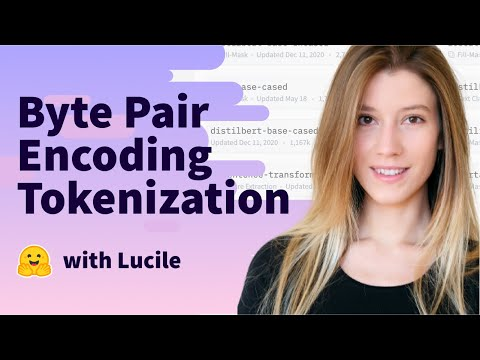

In [ ]:
# Here is a youtube video. See in colab:

from IPython.display import YouTubeVideo
YouTubeVideo('HEikzVL-lZU')

## What is Ollama?
Easily run LLMs locally   
See [here](https://klu.ai/glossary/ollama)

Ollama is a streamlined tool for running open-source LLMs locally, including Mistral and Llama 2. Ollama bundles model weights, configurations, and datasets into a unified package managed by a Modelfile.

Ollama supports a variety of LLMs including LLaMA-2, uncensored LLaMA, CodeLLaMA, Falcon, Mistral, Vicuna model, WizardCoder, and Wizard uncensored.   

Ollama is a tool that allows you to run open-source large language models (LLMs) locally on your machine. It supports a variety of models, including Llama 2, Code Llama, and others. It bundles model weights, configuration, and data into a single package, defined by a Modelfile.

Ollama is an extensible platform that enables the creation, import, and use of custom or pre-existing language models for a variety of applications, including chatbots, summarization tools, and creative writing aids. It prioritizes privacy and is free to use, with seamless integration capabilities for macOS and Linux users, and upcoming support for Windows.

The platform streamlines the deployment of language models on local machines, offering users control and ease of use. Ollama's library (ollama.ai/library) provides access to open-source models such as Mistral, Llama 2, and Code Llama, among others.

System requirements for running models vary; a minimum of 8 GB of RAM is needed for 3B parameter models, 16 GB for 7B, and 32 GB for 13B models. Additionally, Ollama can serve models via a REST API for real-time interactions.

Use cases for Ollama are diverse, ranging from LLM-powered web applications to integration with local note-taking tools like Obsidian. In summary, Ollama offers a versatile and user-friendly environment for leveraging the capabilities of large language models locally for researchers, developers, and AI enthusiasts.

### Models supported

Ollama supports a variety of models, and you can find a list of available models on the Ollama Model Library page.

Ollama supports a variety of large language models. Here are some of the models available on Ollama:

**Mistral** — The Mistral 7B model released by Mistral AI.  
Llama2 — The most popular model for general use.  
**CodeLlama** — A large language model that can use text prompts to generate and discuss code.  
**Llama2-Uncensored** — Uncensored Llama 2 model by George Sung and Jarrad Hope.  
**Orca-Mini** — A general-purpose model ranging from 3 billion parameters to 70 billion, suitable for entry-level hardware.  
**Vicuna** — General use chat model based on Llama and Llama 2 with 2K to 16K context sizes.  
**Wizard-Vicuna-Uncensored** — Wizard Vicuna Uncensored is a 7B, 13B, and 30B parameter model based on Llama 2 uncensored by Eric Hartford.  
**Phind-CodeLlama** — Code generation model based on CodeLlama.  
Nous-Hermes — General use models based on Llama and Llama 2 from Nous Research.
**Mistral-OpenOrca** — Mistral OpenOrca is a 7 billion parameter model, fine-tuned on top of the Mistral 7B model using the OpenOrca dataset.  
**WizardCoder** — Llama based code generation model focused on Python.  
**Wizard-Math** — Model focused on math and logic problems.  
Fine-tuned Llama 2 model — To answer medical questions based on an open source medical dataset.  
**Wizard-Vicuna** — Wizard Vicuna is a 13B parameter model based on Llama 2 trained by MelodysDreamj.  
**Open-Orca-Platypus2** — Merge of the Open Orca OpenChat model and the Garage-bAInd Platypus 2 model. Designed for chat and code generation.  

### Where are ollama models stored?

Ollama models are stored in the `~/.ollama/models` directory on your local machine. On Windows, replace `~/` with `c:\users\ashok\`. This directory contains all the models that you have downloaded or created. The models are stored in a subdirectory named blobs.   

Please note that these models can take up a significant amount of disk space. For instance, the 13b llama2 model requires 32GB of storage. Therefore, it's important to manage your storage space effectively, especially if you're working with multiple large models.

Here is a session from ollama:

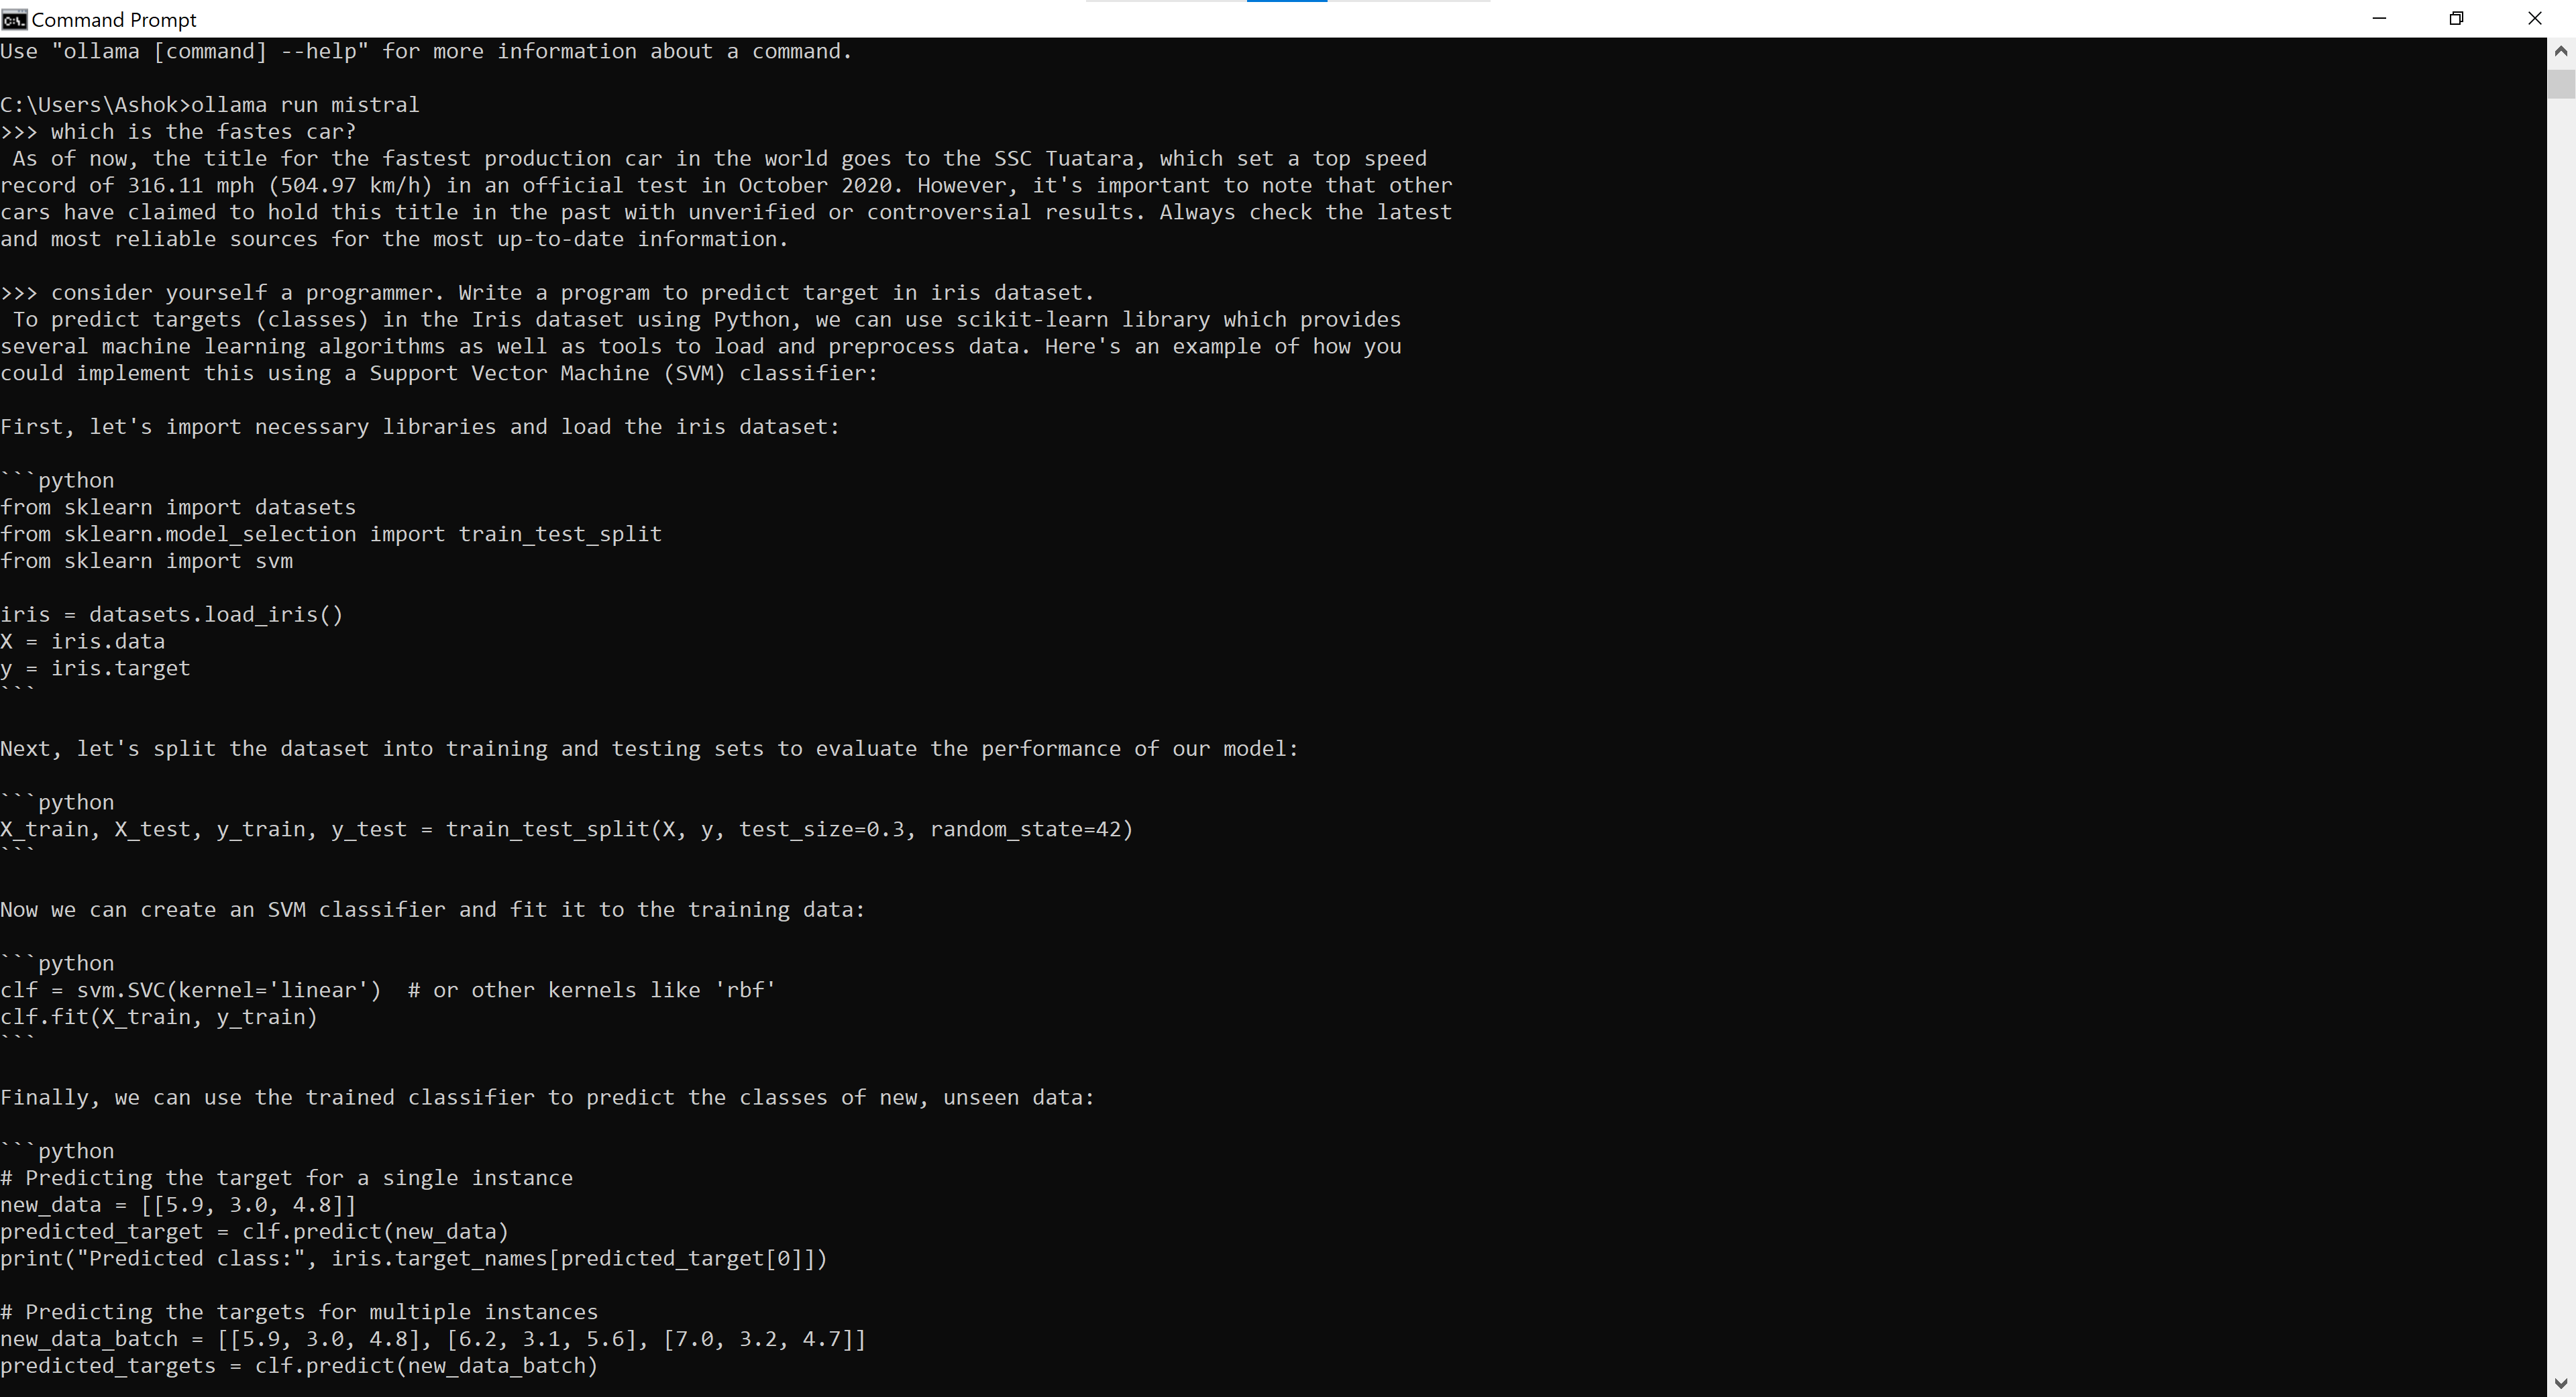

If you run a model that is not installed, it will first be downloaded and then run. See below:

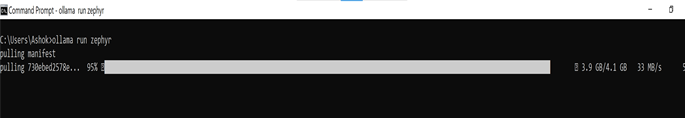

Delete/remove a downloaded model as:

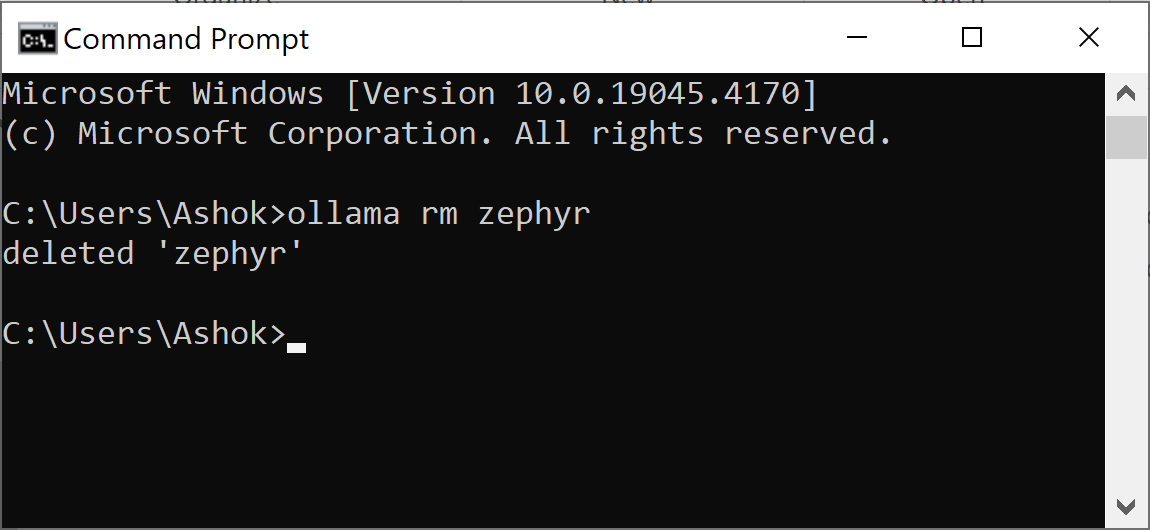

## What is ollama-index
Refer to ollama-index documentation [here](https://docs.llamaindex.ai/en/stable/#why-context-augmentation)

LLMs offer a natural language interface between humans and data. Widely available models come pre-trained on huge amounts of publicly available data like Wikipedia, mailing lists, textbooks, source code and more.

However, while LLMs are trained on a great deal of data, they are not trained on your data, which may be private or specific to the problem you're trying to solve. It's behind APIs, in SQL databases, or trapped in PDFs and slide decks.

You may choose to fine-tune a LLM with your data, but:

* Training a LLM is expensive.
* Due to the cost to train, it's hard to update a LLM with latest information.
* Observability is lacking. When you ask a LLM a question, it's not obvious how the LLM arrived at its answer.

Instead of fine-tuning, one can a context augmentation pattern called Retrieval-Augmented Generation (RAG) to obtain more accurate text generation relevant to your specific data. RAG involves the following high level steps:

* Retrieve information from your data sources first,
* Add it to your question as context, and
* Ask the LLM to answer based on the enriched prompt.

In doing so, RAG overcomes all three weaknesses of the fine-tuning approach:

* There's no training involved, so it's cheap.
*  Data is fetched only when you ask for them, so it's always up to date.
* LlamaIndex can show you the retrieved documents, so it's more trustworthy.


### Why LlamaIndex for Context Augmentation?

Firstly, LlamaIndex imposes no restriction on how you use LLMs. You can still use LLMs as auto-complete, chatbots, semi-autonomous agents, and more (see Use Cases on the left). It only makes LLMs more relevant to you.

LlamaIndex provides the following tools to help you quickly standup production-ready RAG systems:

* Data connectors ingest your existing data from their native source and format. These could be APIs, PDFs, SQL, and (much) more.
* Data indexes structure your data in intermediate representations that are easy and performant for LLMs to consume.

* Engines provide natural language access to your data. For example:

* Query engines are powerful retrieval interfaces for knowledge-augmented output.

* Chat engines are conversational interfaces for multi-message, "back and forth" interactions with your data.

* Data agents are LLM-powered knowledge workers augmented by tools, from simple helper functions to API integrations and more.
* Application integrations tie LlamaIndex back into the rest of your ecosystem. This could be LangChain, Flask, Docker, ChatGPT, or… anything else!    

LlamaIndex provides tools for beginners, advanced users, and everyone in between.

Our high-level API allows beginner users to use LlamaIndex to ingest and query their data in 5 lines of code.
